# Assigment 6: Weather Data Analysis
Author: Anna Lozenko

Get data from this [link](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv).

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data from URL
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
#delete the first 23 rows that are not part of the data table and load the data into a dataframe
df = pd.read_csv(url, skiprows = 23, low_memory=False) #set low_memory to False to avoid dtype warning
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [3]:
#check data types of the columns
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [4]:
#check if there are any missing values in the dataframe
print(df.isnull().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [5]:
print(df.isna().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [6]:
#convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%d-%b-%Y %H:%M")
print(df['date'].dtypes)

datetime64[ns]


In [7]:
#set the date column as the index
df.set_index('date', inplace=True)
df.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


As I can see from the data, there is partial information for the days 10/04/1996 and 31/07/1996. Data is missing between those 2 days. To ensure the accuracy of my analysis, I will remove these two days from the dataset.

In [8]:
#remove data before 01/08/1996
df = df[df.index >= '1996-08-01']
df.head(10)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-08-01 00:00:00,0,0.0,0,9.7,0,9.0,8.3,0.0,0,1011.4,0,0,0,0,1,81,0.0,35000,999,3
1996-08-01 01:00:00,0,0.0,0,9.1,0,8.5,7.9,10.6,92,1011.4,2,6,2,230,2,11,0.0,35000,999,4
1996-08-01 02:00:00,0,0.0,0,10.0,0,8.6,7.1,10.0,82,1011.2,2,8,2,240,2,11,0.0,35000,50,5
1996-08-01 03:00:00,0,0.0,0,10.3,0,9.3,8.3,10.9,87,1011.2,2,9,2,250,2,11,0.0,35000,44,5
1996-08-01 04:00:00,0,0.0,0,10.3,0,8.8,7.2,10.1,81,1011.1,2,8,2,240,2,11,0.0,30000,46,6
1996-08-01 05:00:00,0,0.0,0,10.0,0,9.1,8.2,10.8,88,1011.3,2,8,2,250,2,11,0.0,30000,40,7
1996-08-01 06:00:00,0,0.0,0,10.2,0,9.2,8.1,10.8,87,1011.5,2,8,2,250,2,11,0.0,30000,43,7
1996-08-01 07:00:00,0,0.0,0,10.7,0,9.5,8.3,10.9,85,1011.8,2,7,2,240,2,11,0.0,25000,45,7
1996-08-01 08:00:00,0,0.0,0,10.6,0,9.7,8.8,11.3,89,1012.2,2,11,2,250,2,11,0.0,30000,42,7


## Temperature Analysis

### Plot the hourly Temperature

In [49]:
# check the content and the data type of the 'temp' column, which contains temperature data
print(df['temp'].head())

date
1996-08-01 00:00:00     9.7
1996-08-01 01:00:00     9.1
1996-08-01 02:00:00    10.0
1996-08-01 03:00:00    10.3
1996-08-01 04:00:00    10.3
Name: temp, dtype: float64


0

In [39]:
# set the theme and color palette for seaborn
sns.set_theme(style="whitegrid", palette='coolwarm')

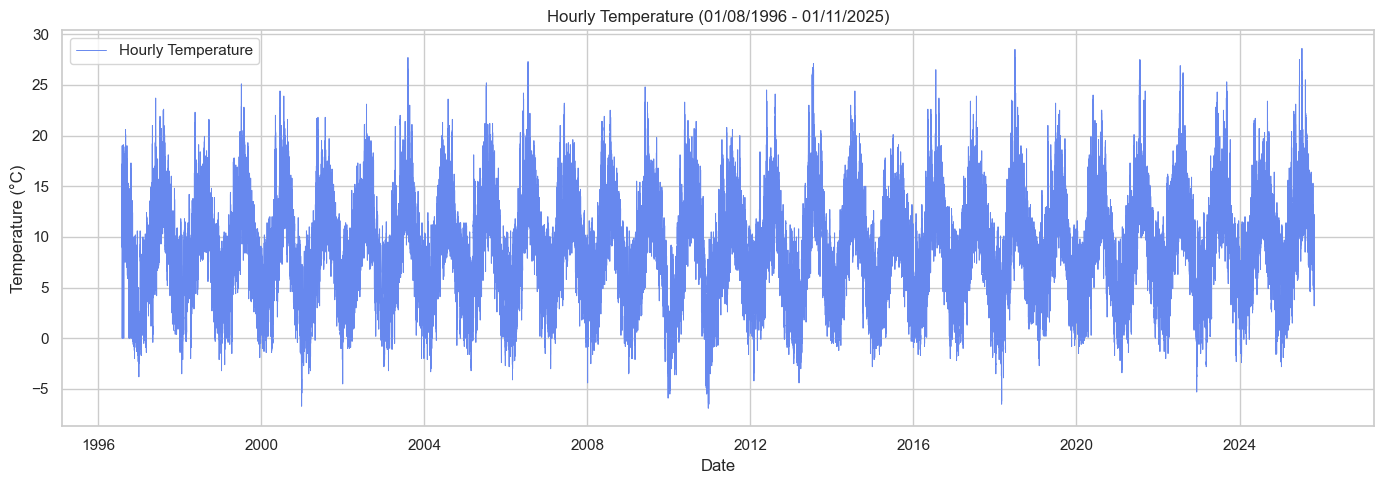

In [51]:
#plot the temperature data for the entire period (01/08/1996-01/11/2025)

plt.figure(figsize=(14,5))

sns.lineplot(
    x=df.index, # x-axis: date
    y=df['temp'], # y-axis: temperature
    linewidth=0.7,
    label='Hourly Temperature'
)

plt.title('Hourly Temperature (01/08/1996 - 01/11/2025)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


As we can see from the plot, there are seasonal variations in temperature over the years. But to better understand the trends, we can calculate the mean temperature for each month and for each day.

### Plot the mean temperature for each month

Compute the monthly mean temperature for each year.

In [60]:
#resample the data to monthly frequency and calculate the mean temperature for each month
monthly_mean = df["temp"].resample("ME").mean()
print(monthly_mean.head())

date
1996-08-31    12.949798
1996-09-30    12.175104
1996-10-31     9.724929
1996-11-30     4.912117
1996-12-31     3.209946
Freq: ME, Name: temp, dtype: float64


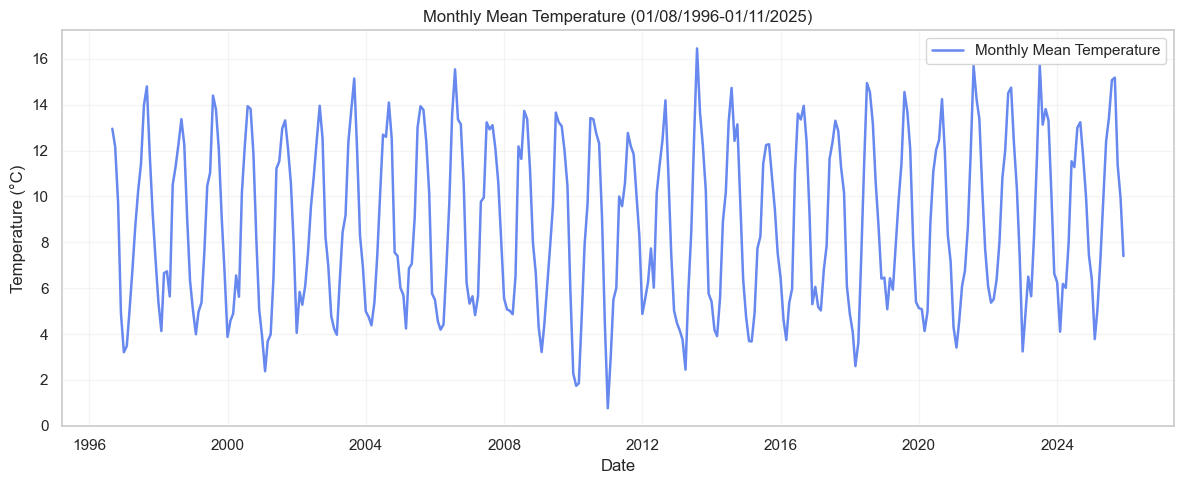

In [61]:
#plot the monthly average temperatures (01/08/1996-01/11/2025)
plt.figure(figsize=(12,5))

sns.lineplot(
    x=monthly_mean.index, # x-axis: date
    y=monthly_mean.values, # y-axis: mean temperature
    label='Monthly Mean Temperature',
    linewidth=1.8
)

plt.title('Monthly Mean Temperature (01/08/1996-01/11/2025)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()


We can also calculate the average temperature for each month over the entire 30-year period to see the seasonal trend.

In [62]:
# calculate the average temperature for each month over the entire period
monthly_mean_group = df['temp'].groupby(df.index.month).mean()


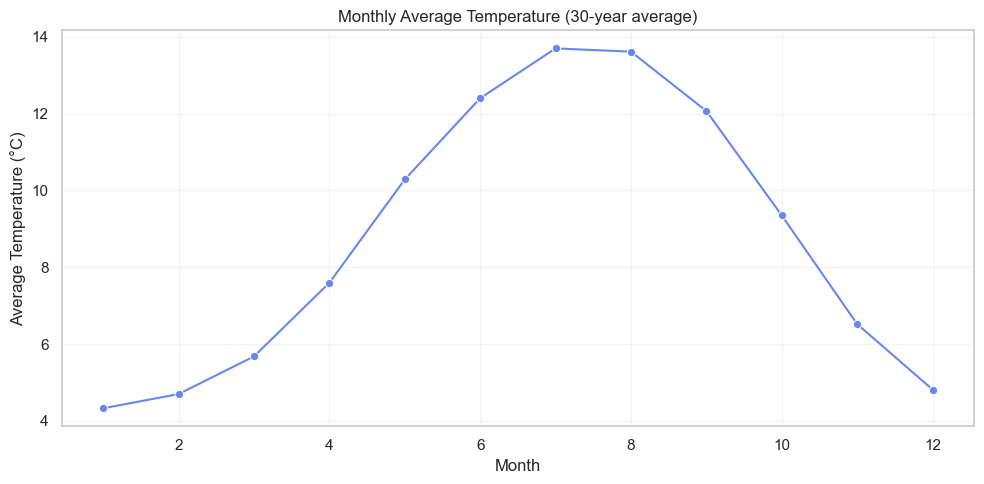

In [63]:
# plot the average temperature for each month over the entire period
plt.figure(figsize=(10,5))

sns.lineplot(
    x=monthly_mean_group.index, # x-axis: month
    y=monthly_mean_group.values, # y-axis: mean temperature
    marker='o',
    linewidth=1.5
)

plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.title("Monthly Average Temperature (30-year average)")

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


To better understand the monthly temperature variations over the years, we can create a heatmap. This will help visualize how temperatures change month to month across different years, highlighting seasonal patterns and anomalies.

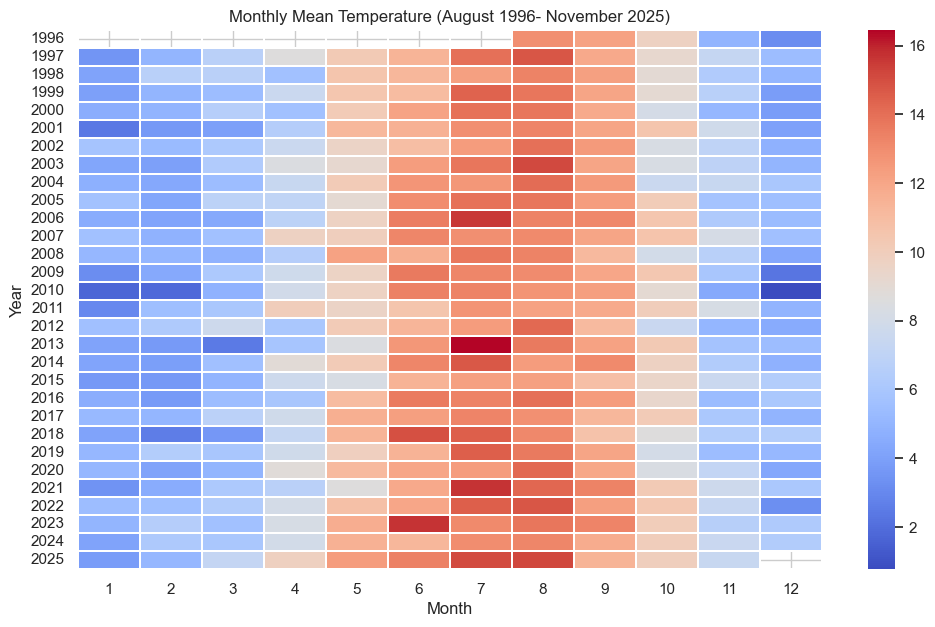

In [66]:
# Create month-year average table
heatmap_data = monthly_mean.to_frame().assign(
    Year=monthly_mean.index.year, # extract year from index
    Month=monthly_mean.index.month # extract month from index
).pivot_table( # create a pivot table with years as rows and months as columns
    index='Year',
    columns='Month',
    values='temp' # temperature values to fill the table
)

plt.figure(figsize=(12,7))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.1)
plt.title("Monthly Mean Temperature (August 1996- November 2025)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


### Plot the mean temperature for each day

In [67]:
# resample the data to daily frequency and calculate the mean temperature for each day
daily_mean = df["temp"].resample("D").mean()
print(daily_mean.head())

date
1996-08-01    11.704348
1996-08-02    12.504167
1996-08-03    14.266667
1996-08-04    13.987500
1996-08-05    11.520833
Freq: D, Name: temp, dtype: float64


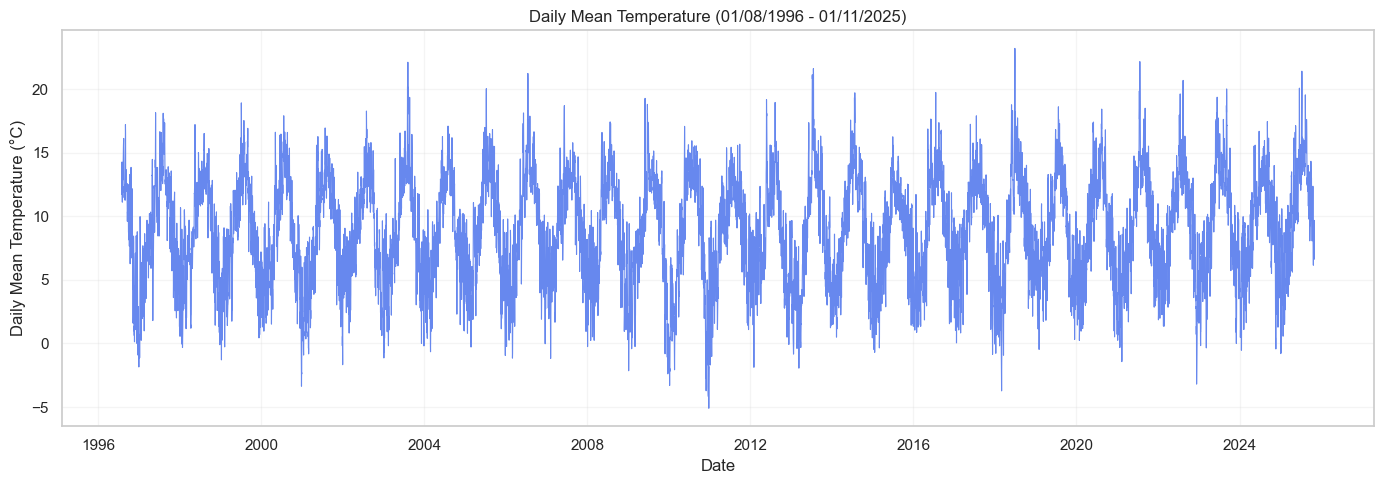

In [79]:
# plot the daily average temperatures (01/08/1996 - 31/07/2025)
plt.figure(figsize=(14,5))

sns.lineplot(
    x=daily_mean.index, # x-axis: date
    y=daily_mean.values, # y-axis: mean temperature
    linewidth=0.8
)

plt.xlabel("Date")
plt.ylabel("Daily Mean Temperature (°C)")
plt.title("Daily Mean Temperature (01/08/1996 - 01/11/2025)")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()



In [71]:
# calculate the average of daily temperature (01/08/1996 - 01/11/2025)
daily_mean_group = df['temp'].groupby(df.index.day).mean()

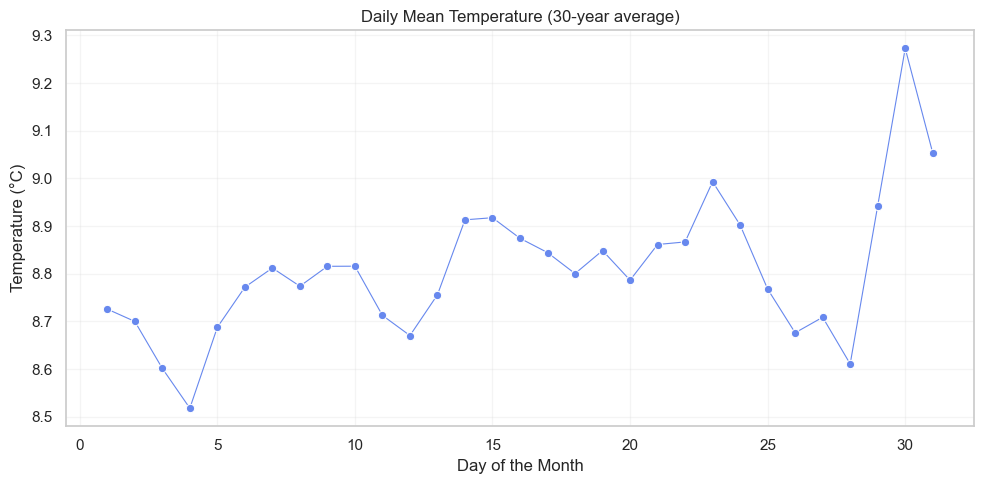

In [74]:
# plot the average daily temperature (01/08/1996 - 01/11/2025)
plt.figure(figsize=(10,5))
sns.lineplot(
    x=daily_mean_group.index,
    y=daily_mean_group.values,
    marker='o',
    linewidth=0.8
)

plt.xlabel("Day of the Month")
plt.ylabel("Temperature (°C)")
plt.title("Daily Mean Temperature (30-year average)")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


## Windspeed Analysis

Windspeed data is stored in the 'wdsp' column of the dataframe. Let's analyze and visualize the windspeed data and its type.

In [20]:
# check the data type of the 'wdsp' column
print(df['wdsp'].dtype)

object


In [80]:
# convert the 'wdsp' column to numeric type, coercing errors to NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

In [81]:
# check for any NaN values in the 'wdsp' column after conversion
print(df['wdsp'].isna().sum())

0


In [82]:
# delete rows with NaN values in the 'wdsp' column
df = df.dropna(subset=['wdsp'])

In [83]:
# verify that there are no more NaN values in the 'wdsp' column
print(df['wdsp'].isna().sum())

0


### Plot the Hourly Windspeed

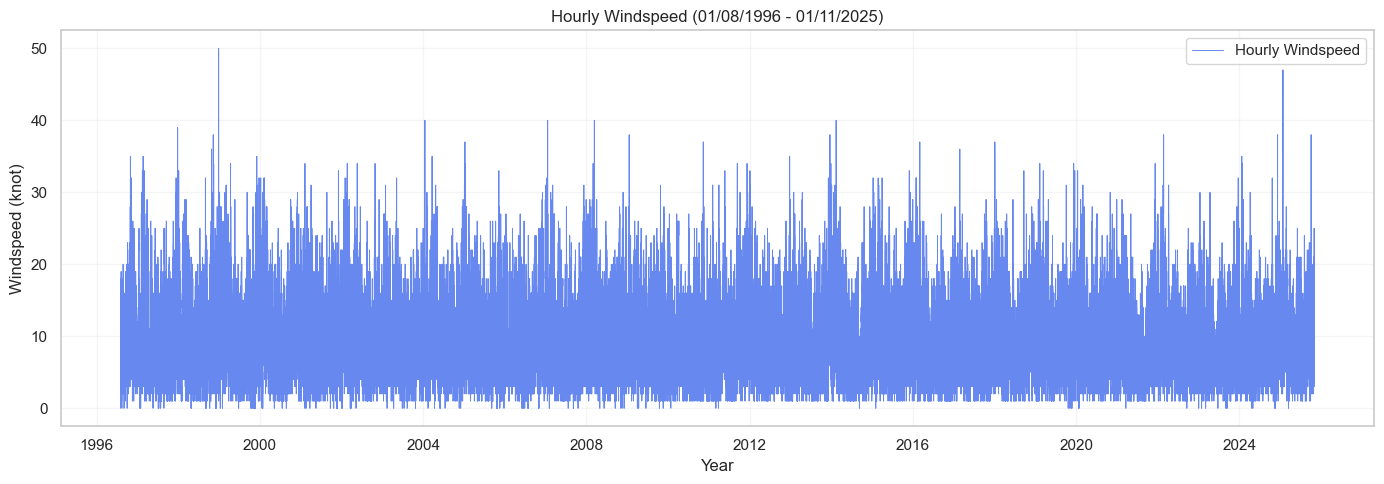

In [84]:
# plot the windspeed data for the entire period (01/08/1996 - 01/11/2025)
plt.figure(figsize=(14,5))

sns.lineplot(
    x=df.index, # x-axis: date
    y=df['wdsp'], # y-axis: windspeed
    linewidth=0.7,
    label='Hourly Windspeed'
)

plt.title('Hourly Windspeed (01/08/1996 - 01/11/2025)')
plt.xlabel('Year')
plt.ylabel('Windspeed (knot)')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()



### Plot the rolling Windspeed over 24 hours

In [85]:
# calculate the rolling mean windspeed over a 24-hour window
rolling_ws= df['wdsp'].rolling('24h').mean()


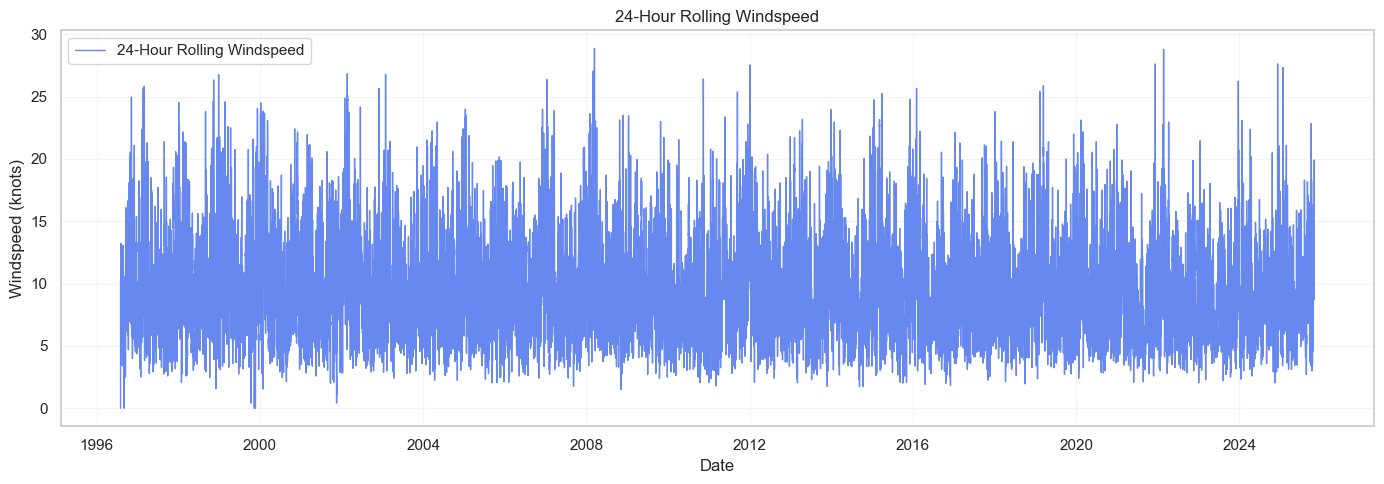

In [87]:
# plot the 24-hour rolling windspeed
plt.figure(figsize=(14,5))

sns.lineplot(
    x=rolling_ws.index, # x-axis: date
    y=rolling_ws.values, # y-axis: rolling windspeed,
    label='24-Hour Rolling Windspeed',
    linewidth=1.0
)

plt.title("24-Hour Rolling Windspeed")
plt.xlabel("Date")
plt.ylabel("Windspeed (knots)")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


### Plot the maximum Windspeed for each day

In [88]:
# resample the data to daily frequency and calculate the maximum windspeed for each day
daily_max_ws = df["wdsp"].resample("D").max()
print(daily_max_ws.head())

date
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
1996-08-04    18.0
1996-08-05    14.0
Freq: D, Name: wdsp, dtype: float64


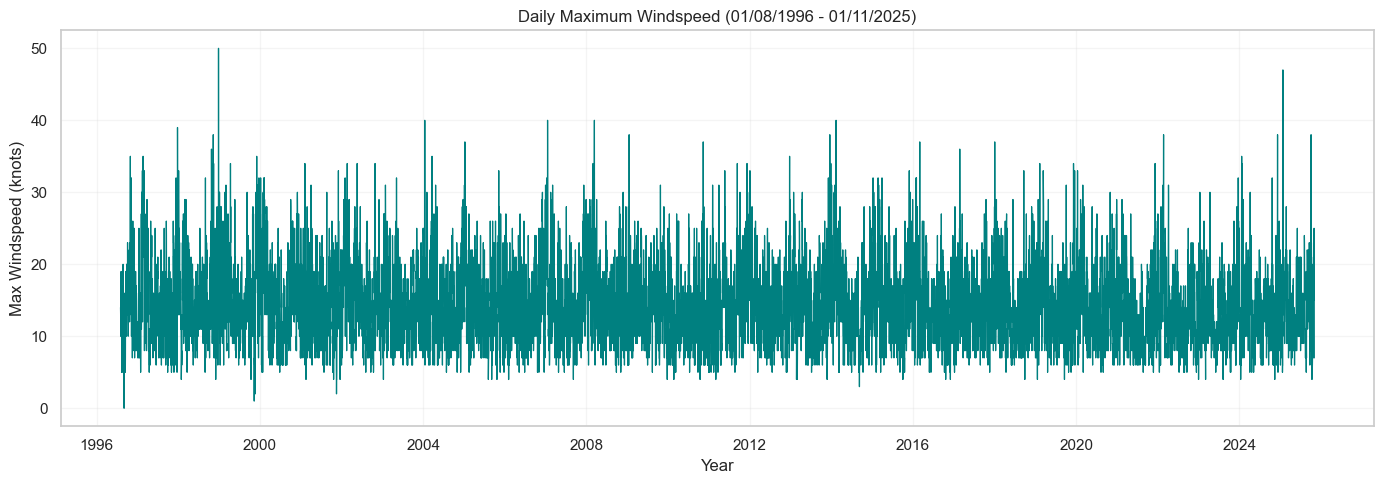

In [89]:
# plot the daily maximum windspeed (01/08/1996 - 01/11/2025)
plt.figure(figsize=(14,5))

sns.lineplot(
    x=daily_max_ws.index, # x-axis: date
    y=daily_max_ws.values, # y-axis: daily maximum windspeed
    linewidth=0.9,
    color='teal'
)

plt.title("Daily Maximum Windspeed (01/08/1996 - 01/11/2025)")
plt.xlabel("Year")
plt.ylabel("Max Windspeed (knots)")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


#



### Plot the monthly mean of the daily max windspeeds

In [30]:
# resample the daily maximum windspeed data to monthly frequency and calculate the mean of daily max windspeed for each month
monthly_mean_daily_max = daily_max_ws.resample('ME').mean()
print(monthly_mean_daily_max.head())

date
1996-08-31    12.516129
1996-09-30    12.266667
1996-10-31    18.193548
1996-11-30    17.133333
1996-12-31    13.258065
Freq: ME, Name: wdsp, dtype: float64


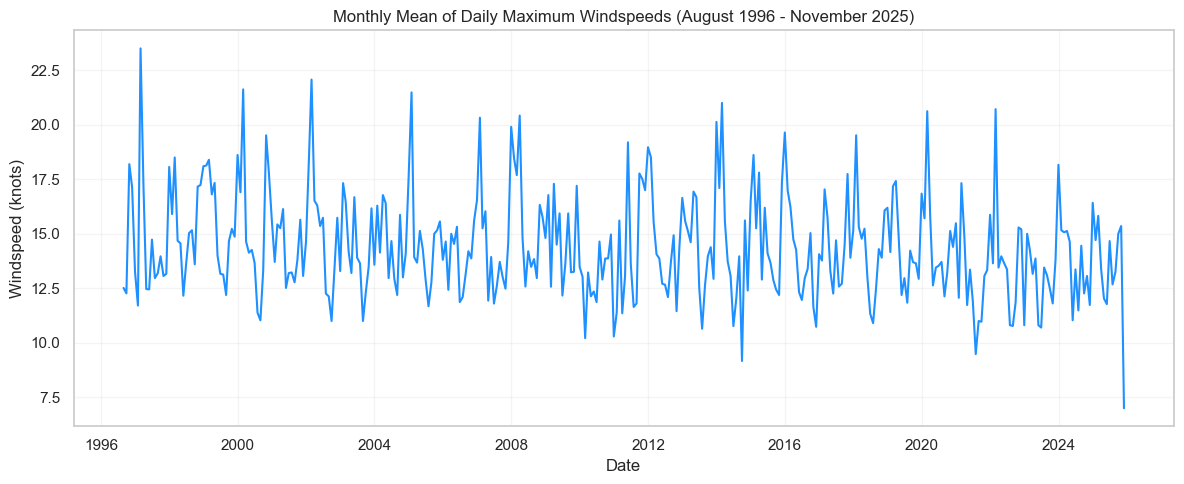

In [91]:
# plot the monthly mean of daily maximum windspeed (01/08/1996 - 01/11/2025)
plt.figure(figsize=(12,5))

sns.lineplot(
    x=monthly_mean_daily_max.index,
    y=monthly_mean_daily_max.values,
    color='dodgerblue',
    linewidth=1.5
)

plt.title("Monthly Mean of Daily Maximum Windspeeds (August 1996 - November 2025)")
plt.xlabel("Date")
plt.ylabel("Windspeed (knots)")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


## End